In [74]:
import pandas as pd
df = pd.read_csv('T1/wine.csv')
df.head(5)

,density,pH,alcohol,quality
0,1.0010,3.00,8.8,6.0
1,0.9940,3.30,NaN,6.0
2,0.9951,3.26,10.1,6.0
3,NaN,NaN,NaN,NaN
4,0.9956,3.19,9.9,6.0


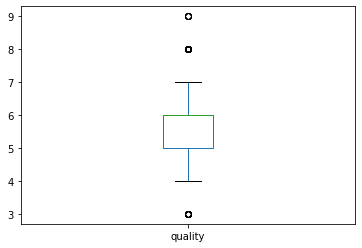

In [75]:
df.quality.plot.box()

In [76]:
df = df.dropna(axis=0,how='all')
df

,density,pH,alcohol,quality
0,1.00100,3.00,8.8,6.0
1,0.99400,3.30,NaN,6.0
2,0.99510,3.26,10.1,6.0
4,0.99560,3.19,9.9,6.0
5,0.99510,3.26,10.1,6.0
...,...,...,...,...
4893,0.99114,3.27,11.2,6.0
4894,0.99490,3.15,9.6,5.0
4895,0.99254,2.99,9.4,6.0
4896,0.98869,3.34,12.8,7.0


In [63]:
df.T.fillna(df.mean(axis=1)).T

,density,pH,alcohol,quality
0,1.00100,3.00,8.800000,6.0
1,0.99400,3.30,3.431333,6.0
2,0.99510,3.26,10.100000,6.0
4,0.99560,3.19,9.900000,6.0
5,0.99510,3.26,10.100000,6.0
...,...,...,...,...
4893,0.99114,3.27,11.200000,6.0
4894,0.99490,3.15,9.600000,5.0
4895,0.99254,2.99,9.400000,6.0
4896,0.98869,3.34,12.800000,7.0


In [64]:
df = pd.read_csv('T1/titanic.csv')
df.head(5)

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


In [65]:
df1 = pd.pivot_table(df, index = ['Class','Sex','Age'],values = ['Freq'],columns='Survived', aggfunc=sum)
#df1 = pd.pivot_table(df, index = [x轴括号里的东西],values = [y轴],columns=颜色, aggfunc=sum)
df2 = df1.div(df1.sum(axis=1),axis=0)

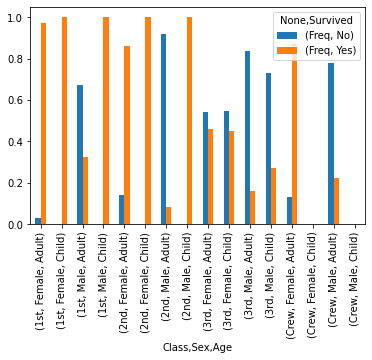

In [66]:
df2.plot.bar()

In [67]:
df = pd.read_csv('T1/vehicle.csv')
df.head(10)

,Model,Displ,Cyl,Drive,Veh Class,Cmb MPG
0,ACURA MDX,3.7,6.0,4WD,SUV,18.0
1,ACURA MDX,3.7,6.0,4WD,SUV,18.0
2,ACURA RDX,2.3,4.0,4WD,SUV,19.0
3,ACURA RDX,2.3,4.0,4WD,SUV,19.0
4,ACURA RDX,2.3,4.0,2WD,SUV,21.0
5,ACURA RDX,2.3,4.0,2WD,SUV,21.0
6,ACURA TL,3.5,6.0,2WD,midsize car,23.0
7,ACURA TL,3.5,6.0,2WD,midsize car,23.0
8,ACURA TL,3.7,6.0,4WD,midsize car,20.0
9,ACURA TL,3.7,6.0,4WD,midsize car,20.0


In [68]:
gp = df.groupby('Veh Class')

In [69]:
gp.get_group('SUV').describe()

,Displ,Cyl,Cmb MPG
count,439.000000,439.000000,439.000000
mean,3.323235,5.553531,20.435080
std,1.039563,1.385255,3.422295
min,2.000000,4.000000,12.000000
25%,2.400000,4.000000,18.000000
50%,3.200000,6.000000,21.000000
75%,3.700000,6.000000,23.000000
max,6.400000,8.000000,32.000000


In [70]:
df_new = gp.describe()['Cmb MPG']

In [71]:
#df_new = gp['Cmb MPG'].describe().reset_index()
#df_new = pd.DataFrame()
#for i,j in gp:
#    df_new[i] = j.describe()['Cmb MPG']
#df_new = df_new.T.reset_index()
df_new

,count,mean,std,min,25%,50%,75%,max
Veh Class,,,,,,,,
SUV,439.0,20.435080,3.422295,12.0,18.00,21.0,23.0,32.0
large car,143.0,18.923077,3.989558,12.0,16.50,18.0,21.0,28.0
midsize car,261.0,24.421456,5.934138,13.0,20.00,24.0,28.0,50.0
minivan,11.0,22.090909,1.513575,21.0,21.00,21.0,24.0,24.0
pickup,98.0,17.795918,2.261097,13.0,16.00,17.0,19.0,22.0
small car,824.0,23.457524,5.806992,10.0,20.00,22.0,27.0,50.0
special purpose,5.0,17.600000,5.458938,13.0,13.00,15.0,23.0,24.0
station wagon,128.0,25.093750,4.495733,14.0,22.00,25.0,27.0,42.0
van,6.0,15.166667,2.857738,11.0,13.25,17.0,17.0,17.0


In [72]:
#df.merge(df_new, left_on='Veh Class', right_on='index').sort_values(by='Cmb MPG', ascending=False).drop(columns='index')
df.merge(df_new, left_on='Veh Class', right_on='Veh Class').sort_values(by='Cmb MPG', ascending=False)

,Model,Displ,Cyl,Drive,Veh Class,Cmb MPG,count,mean,std,min,25%,50%,75%,max
681,TOYOTA Prius,1.8,4.0,2WD,midsize car,50.0,261.0,24.421456,5.934138,13.0,20.00,24.0,28.0,50.0
1450,TOYOTA Prius c,1.5,4.0,2WD,small car,50.0,824.0,23.457524,5.806992,10.0,20.00,22.0,27.0,50.0
1451,TOYOTA Prius c,1.5,4.0,2WD,small car,50.0,824.0,23.457524,5.806992,10.0,20.00,22.0,27.0,50.0
682,TOYOTA Prius,1.8,4.0,2WD,midsize car,50.0,261.0,24.421456,5.934138,13.0,20.00,24.0,28.0,50.0
971,HONDA Civic Hybrid,1.5,4.0,2WD,small car,44.0,824.0,23.457524,5.806992,10.0,20.00,22.0,27.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,MERCEDES-BENZ Maybach 62S,5.5,12.0,2WD,large car,12.0,143.0,18.923077,3.989558,12.0,16.50,18.0,21.0,28.0
1754,MERCEDES-BENZ Maybach 62,5.5,12.0,2WD,large car,12.0,143.0,18.923077,3.989558,12.0,16.50,18.0,21.0,28.0
1895,FORD E350,6.8,10.0,2WD,van,11.0,6.0,15.166667,2.857738,11.0,13.25,17.0,17.0,17.0
881,BUGATTI Veyron,8.0,16.0,4WD,small car,10.0,824.0,23.457524,5.806992,10.0,20.00,22.0,27.0,50.0
